In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importation de la librairie seaborn:
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
# import sys
# sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress a specific warning type
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Load the data 
df = pd.read_json("Test/ergometer_500m.json")

In [4]:
# Calcul de la vitesse en km/h (distance en km / temps en heures)
df['split_time_hours'] = df['split_time'] / 3600  # Conversion du temps en heures
df['speed_kmh'] = (0.5 / df['split_time_hours'])  # La distance est de 0.5 km (500m)
df['speed_category'] = pd.cut(df['speed_kmh'], bins=[0, 13.5, 15, 20], labels=[0, 1, 2])

X = df[['split_calories','speed_category','split_drag_factor','split_stroke_rate','split_stroke_count']]
y = df['place']

X_noms = X.columns

In [5]:
df

,split_avg_pace,split_calories,split_distance,split_drag_factor,split_running_calories,split_running_distance,split_running_time,split_stroke_count,split_stroke_rate,split_time,split_type,participant,serial_number,calories,place,split_time_hours,speed_kmh,speed_category
0,1:59.4,33,500,120,33,500,119.4,56,28,119.4,distance_split,Eric,430839301,131,1,0.033167,15.075377,2
1,2:01.2,32,500,120,65,1000,240.6,53,26,121.2,distance_split,Eric,430839301,131,1,0.033667,14.851485,1
2,2:01.2,32,500,120,97,1500,361.8,54,27,121.2,distance_split,Eric,430839301,131,1,0.033667,14.851485,1
3,1:55.5,34,500,120,131,2000,477.3,56,29,115.5,distance_split,Eric,430839301,131,1,0.032083,15.584416,2
4,1:54.8,35,500,121,35,500,114.8,59,31,114.8,distance_split,Edouard,530398582,130,2,0.031889,15.679443,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2:11.0,30,500,117,119,2000,528.8,71,33,131.0,distance_split,Julie,530087901,119,3,0.036389,13.740458,1
124,2:07.2,31,500,131,31,500,127.2,56,26,127.2,distance_split,Hervé,530398582,119,4,0.035333,14.150943,1
125,2:13.4,29,500,115,60,1000,260.6,56,25,133.4,distance_split,Hervé,530398582,119,4,0.037056,13.493253,0
126,2:16.5,29,500,115,89,1500,397.1,61,27,136.5,distance_split,Hervé,530398582,119,4,0.037917,13.186813,0


In [6]:
X

,split_calories,speed_category,split_drag_factor,split_stroke_rate,split_stroke_count
0,33,2,120,28,56
1,32,1,120,26,53
2,32,1,120,27,54
3,34,2,120,29,56
4,35,2,121,31,59
...,...,...,...,...,...
123,30,1,117,33,71
124,31,1,131,26,56
125,29,0,115,25,56
126,29,0,115,27,61


In [7]:
y

0      1
1      1
2      1
3      1
4      2
      ..
123    3
124    4
125    4
126    4
127    4
Name: place, Length: 128, dtype: int64

In [8]:
np.unique(y)

array([1, 2, 3, 4])

## Prétraitement de données

### Division de base de données

In [9]:
X = np.array(X)
y = np.array(y)

# Définition de variables
dim = len(X[0])
nb_labels = len(np.unique(y))

In [10]:
# -----
# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42)
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y,25)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

import random

index = random.sample(range(len(X)),70)
data_cv, label_cv = X[index], y[index]

### Réduction de données 3D => 2D

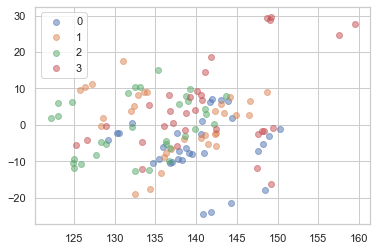

In [11]:
# A réaliser :

# 1) calcul des vecteurs propres
lam_train, V_train = np.linalg.eig(X.T @ X)
# lam_test, V_test = np.linalg.eig(XTu.T @ XTu)

# Trouver les indices des deux plus grandes valeurs propres
largest_indices = np.argsort(lam_train)[::-1][:2]



# Extraire les deux plus grandes valeurs propres et leurs vecteurs propres correspondants
largest_eigenvalues = lam_train[largest_indices]


max_train = V_train[:, largest_indices]
# max_test = V_test[:, np.argmax(lam_test)]


# 2) affichage (print)
#print("1er valeur rendue:\n", lam_train)
#print("2e valeur rendue :\n", V_train)

# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
#print("Vecteur train :\n", max_train)

# 4) affichage (plot) avec un code couleur pour les classes
for i in np.unique(y) :
  one_train = X[y==i]
  #print(one_train)

  projected_data_train = np.dot(one_train, max_train)

  plt.scatter(projected_data_train[:,0], projected_data_train[:,1],alpha=.5)


# ####################################
plt.legend(np.arange(10))

#plt.savefig("out/proj_usps_all.png",bbox_inches='tight', transparent=True,pad_inches=0)



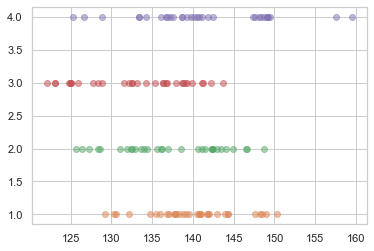

In [12]:
import math 
plt.figure()

lam, V = np.linalg.eig(X.T @ X)
max_eigenvalue_index = np.argmax(lam)
max_eigenvector = V[:, max_eigenvalue_index]

for i in range(10) : 
  data = X[y==i]
  projected_data = np.dot(data, max_eigenvector)
  plt.scatter(projected_data, [i for _ in range(len(projected_data))], alpha=0.5)

## Algorithme de $k$ plus proches voisins

### Classification des 10 premiers exemples du dataset

In [13]:
np.random.seed(42)

# Création d'un knn avec k=1 et 16 dimensions pour les données
KNN = classif.ClassifierKNN(dim, 1)

KNN.train(data_train,label_train)

# Classification du dataset (contrôle de predict et score):
print("Classification des 10 premiers exemples du dataset:")

for i in range(0,10):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(X[i,:][0], X[i,:][1], \
                                                                  y[i], \
                                                                  KNN.predict(X[i,:]), \
                                                                  KNN.score(X[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset train: ", KNN.accuracy(data_train,label_train))   
print("Taux de bonne classification sur le dataset test: ", KNN.accuracy(data_test,label_test))   


Classification des 10 premiers exemples du dataset:
	+33.000 +2.000 : +1 ---> +1 [+0.00000]
	+32.000 +1.000 : +1 ---> +1 [+0.00000]
	+32.000 +1.000 : +1 ---> +1 [+0.00000]
	+34.000 +2.000 : +1 ---> +1 [+0.00000]
	+35.000 +2.000 : +2 ---> +2 [+1.00000]
	+31.000 +1.000 : +2 ---> +2 [+1.00000]
	+31.000 +1.000 : +2 ---> +2 [+1.00000]
	+33.000 +2.000 : +2 ---> +2 [+1.00000]
	+33.000 +2.000 : +3 ---> +3 [+2.00000]
	+31.000 +1.000 : +3 ---> +3 [+2.00000]
Taux de bonne classification sur le dataset train:  0.0
Taux de bonne classification sur le dataset test:  0.17857142857142858


### Performances du modèle en fonction de $k$ en faisant varier $k$ de $1$ à $20$.

In [14]:
# on stocke les accuracies dans une liste :
accuracies = []

# seuil max des valeurs de k à regarder:
seuil_k = len(data_train) // 5

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]

print("Liste des valeurs de  à tester :",valeurs_k)

for k in valeurs_k:
        
    KNN = classif.ClassifierKNN(dim,k)
    KNN.train(data_train, label_train)
    a = KNN.accuracy(data_test, label_test)
    accuracies.append(a)
    
# ---------------------------------------------
for i in range(0,len(valeurs_k)):
    print("Accuracy pour ",valeurs_k[i],":",accuracies[i])


Liste des valeurs de  à tester : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
Accuracy pour  1 : 0.17857142857142858
Accuracy pour  3 : 0.10714285714285714
Accuracy pour  5 : 0.21428571428571427
Accuracy pour  7 : 0.17857142857142858
Accuracy pour  9 : 0.21428571428571427
Accuracy pour  11 : 0.25
Accuracy pour  13 : 0.14285714285714285
Accuracy pour  15 : 0.2857142857142857
Accuracy pour  17 : 0.21428571428571427
Accuracy pour  19 : 0.21428571428571427


### Accuracy en fonction de la valeur de $k$

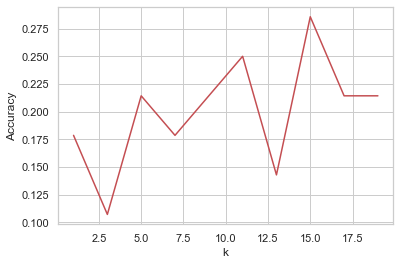

In [15]:
# Tracé de la variation de l'accuracy en fonction de la valeur de k:
# 
# Tracer de la courbe des variations
plt.plot(valeurs_k, accuracies, color='r')  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()


### Étude de la validation croisée

In [16]:
print("------ affichage validation croisée")

#################################

# ce qui se passe:
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(KNN, (data_cv, label_cv), 10)
toc= time.time()

print("------ fin affichage validation croisée")

print("Validation croisée sur ergometer :")
print("Perf obtenues : ",res_all)
print(f'Accuracy moyenne: {res_moy:0.3f}\técart type: {res_sd:0.4f}')
print(f'Résultat en {(toc-tic):0.4f} secondes.')

------ affichage validation croisée
Itération 0  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 1  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 2  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.14285714285714285
Itération 3  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 4  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 5  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 6  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.14285714285714285
Itération 7  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.14285714285714285
Itération 8  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.0
Itération 9  : taille base app.= 63  taille base test= 7  Taux de bonne cl

## Perceptron de Rosenblatt

In [17]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine pour tester

# -----
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = classif.ClassifierPerceptron(dim,learning_rate=learning_rate)

#### Apprentissage pas à pas et variation d'accuracy

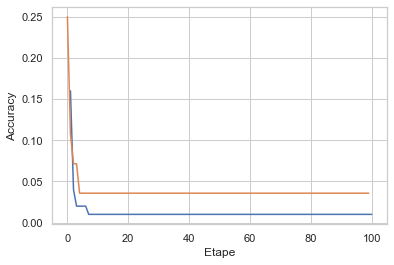

Accuracy finale (train):  0.01
Accuracy finale (test) :  0.03571428571428571


In [18]:
# -----
# Apprentissage pas à pas du perceptron et mémorisation de l'accuracy à chaque étape:
# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []

# Réalisation de N itérations
N = 100
for i in range(N) : 
    L_train = perceptron.train(data_train, label_train)
    train_acc.append(perceptron.accuracy(data_train, label_train))
    
    L_test = perceptron.train(data_test, label_test)
    test_acc.append(perceptron.accuracy(data_test, label_test))

# -----
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()


print("Accuracy finale (train): ", train_acc[len(train_acc)-1])
print("Accuracy finale (test) : ", test_acc[len(test_acc)-1])


Nb iterations réalisées:  100


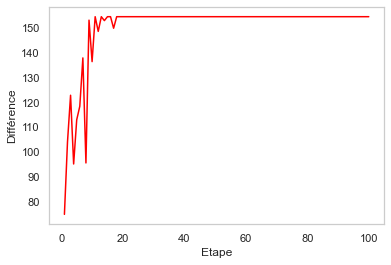

Les variations : [74.83434505626411, 103.97381689637064, 122.7984731175433, 95.12270496574413, 112.92127346076106, 118.35231810150533, 137.82845061887588, 95.54044379214498, 153.0383043554784, 136.34036966357428, 154.42902965440155, 148.5111329160209, 154.42902965440194, 152.8535292363254, 154.42902965440206, 154.42902965440206, 149.78935275913358, 154.42902965440206, 154.42902965440203, 154.4290296544021, 154.42902965440226, 154.42902965440237, 154.42902965440084, 154.42902965440084, 154.42902965440084, 154.42902965440084, 154.42902965440084, 154.42902965440084, 154.42902965440084, 154.4290296544008, 154.42902965440084, 154.42902965440086, 154.42902965440086, 154.42902965440086, 154.42902965440095, 154.42902965440112, 154.4290296544006, 154.42902965440044, 154.42902965440027, 154.42902965439734, 154.4290296543979, 154.4290296543979, 154.4290296543979, 154.4290296543979, 154.4290296543979, 154.4290296543979, 154.4290296543979, 154.4290296543979, 154.4290296543979, 154.4290296543979, 15

In [20]:
# Apprentissage du perceptron jusqu'à convergence
perceptron = classif.ClassifierPerceptron(dim,learning_rate=learning_rate)
les_variations = perceptron.train(data_train, label_train)
print("Nb iterations réalisées: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations, color="red")  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.grid()
plt.show()

#L_train = perceptron2.train(data_train, label_train)
L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))


### Initialisation aléatoire et convergence

Nb iterations:  1000


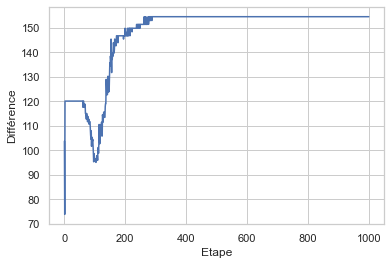

Les variations : [103.73898592139795, 73.91701969100218, 120.06001665833637, 120.06001665833638, 120.060016658336, 120.060016658336, 120.06001665833621, 120.0600166583363, 120.06001665833627, 120.06001665833625, 120.06001665833622, 120.06001665833621, 120.06001665833605, 120.06001665833666, 120.06001665833666, 120.06001665833666, 120.06001665833668, 120.06001665833655, 120.06001665833662, 120.06001665833672, 120.06001665833676, 120.06001665833675, 120.06001665833686, 120.0600166583369, 120.06001665833679, 120.06001665833689, 120.06001665833689, 120.06001665833689, 120.06001665833689, 120.06001665833689, 120.06001665833688, 120.06001665833686, 120.06001665833685, 120.06001665833683, 120.06001665833696, 120.06001665833708, 120.06001665833705, 120.06001665833688, 120.06001665833706, 120.06001665833706, 120.06001665833706, 120.06001665833706, 120.06001665833706, 120.06001665833706, 120.06001665833686, 120.06001665833647, 120.06001665833647, 120.06001665833642, 120.06001665833489, 120.06001

In [21]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000)
print("Nb iterations: ", len(les_variations))


# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))

### Impact du learning rate

Pour $\alpha=0.1$ : 

Nb iterations:  1000


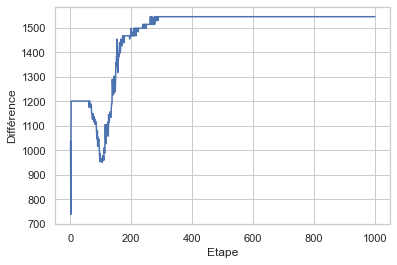

Les variations : [1037.3898592139794, 739.1701969100214, 1200.6001665833635, 1200.6001665833646, 1200.600166583365, 1200.6001665833644, 1200.6001665833621, 1200.6001665833624, 1200.6001665833626, 1200.6001665833626, 1200.6001665833628, 1200.6001665833583, 1200.6001665833583, 1200.600166583358, 1200.6001665833576, 1200.6001665833571, 1200.6001665833571, 1200.6001665833571, 1200.6001665833587, 1200.6001665833592, 1200.6001665833694, 1200.6001665833694, 1200.6001665833694, 1200.6001665833694, 1200.6001665833694, 1200.6001665833694, 1200.6001665833696, 1200.6001665833683, 1200.6001665833676, 1200.6001665833676, 1200.6001665833676, 1200.600166583368, 1200.600166583368, 1200.600166583368, 1200.600166583368, 1200.600166583365, 1200.6001665833683, 1200.6001665833683, 1200.6001665833744, 1200.6001665833842, 1200.6001665833842, 1200.6001665833842, 1200.6001665833842, 1200.6001665833842, 1200.6001665833842, 1200.6001665833842, 1200.6001665833842, 1200.6001665833842, 1200.6001665833842, 1200.60016

In [22]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.1
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000)
print("Nb iterations: ", len(les_variations))


# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))

Pour $\alpha=0.001$ : 

Nb iterations:  1000


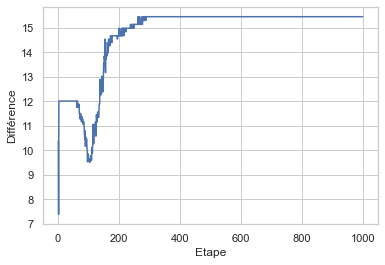

Accuracy finale (train):  0.0
Accuracy finale (test) :  0.0


In [23]:
# Par exemple : 

# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.001
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000,seuil=1E-6)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test) )


### Étude de la validation croisée

In [24]:
print("------ affichage validation croisée")

#################################

# ce qui se passe:
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(perceptron, (data_cv, label_cv), 10)
toc= time.time()

print("------ fin affichage validation croisée")

print("Validation croisée sur pen_dataset :")
print("Perf obtenues : ",res_all)
print(f'Accuracy moyenne: {res_moy:0.3f}\técart type: {res_sd:0.4f}')
print(f'Résultat en {(toc-tic):0.4f} secondes.')

------ affichage validation croisée
Itération 0  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 1  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 2  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.5714285714285714
Itération 3  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.14285714285714285
Itération 4  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 5  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.14285714285714285
Itération 6  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.0
Itération 7  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.14285714285714285
Itération 8  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.0
Itération 9  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.142857

## Arbre de décision 

In [25]:
import graphviz as gv

### Premier essai avec un seuil d'entropie bas

Cet arbre possède  52  feuilles.


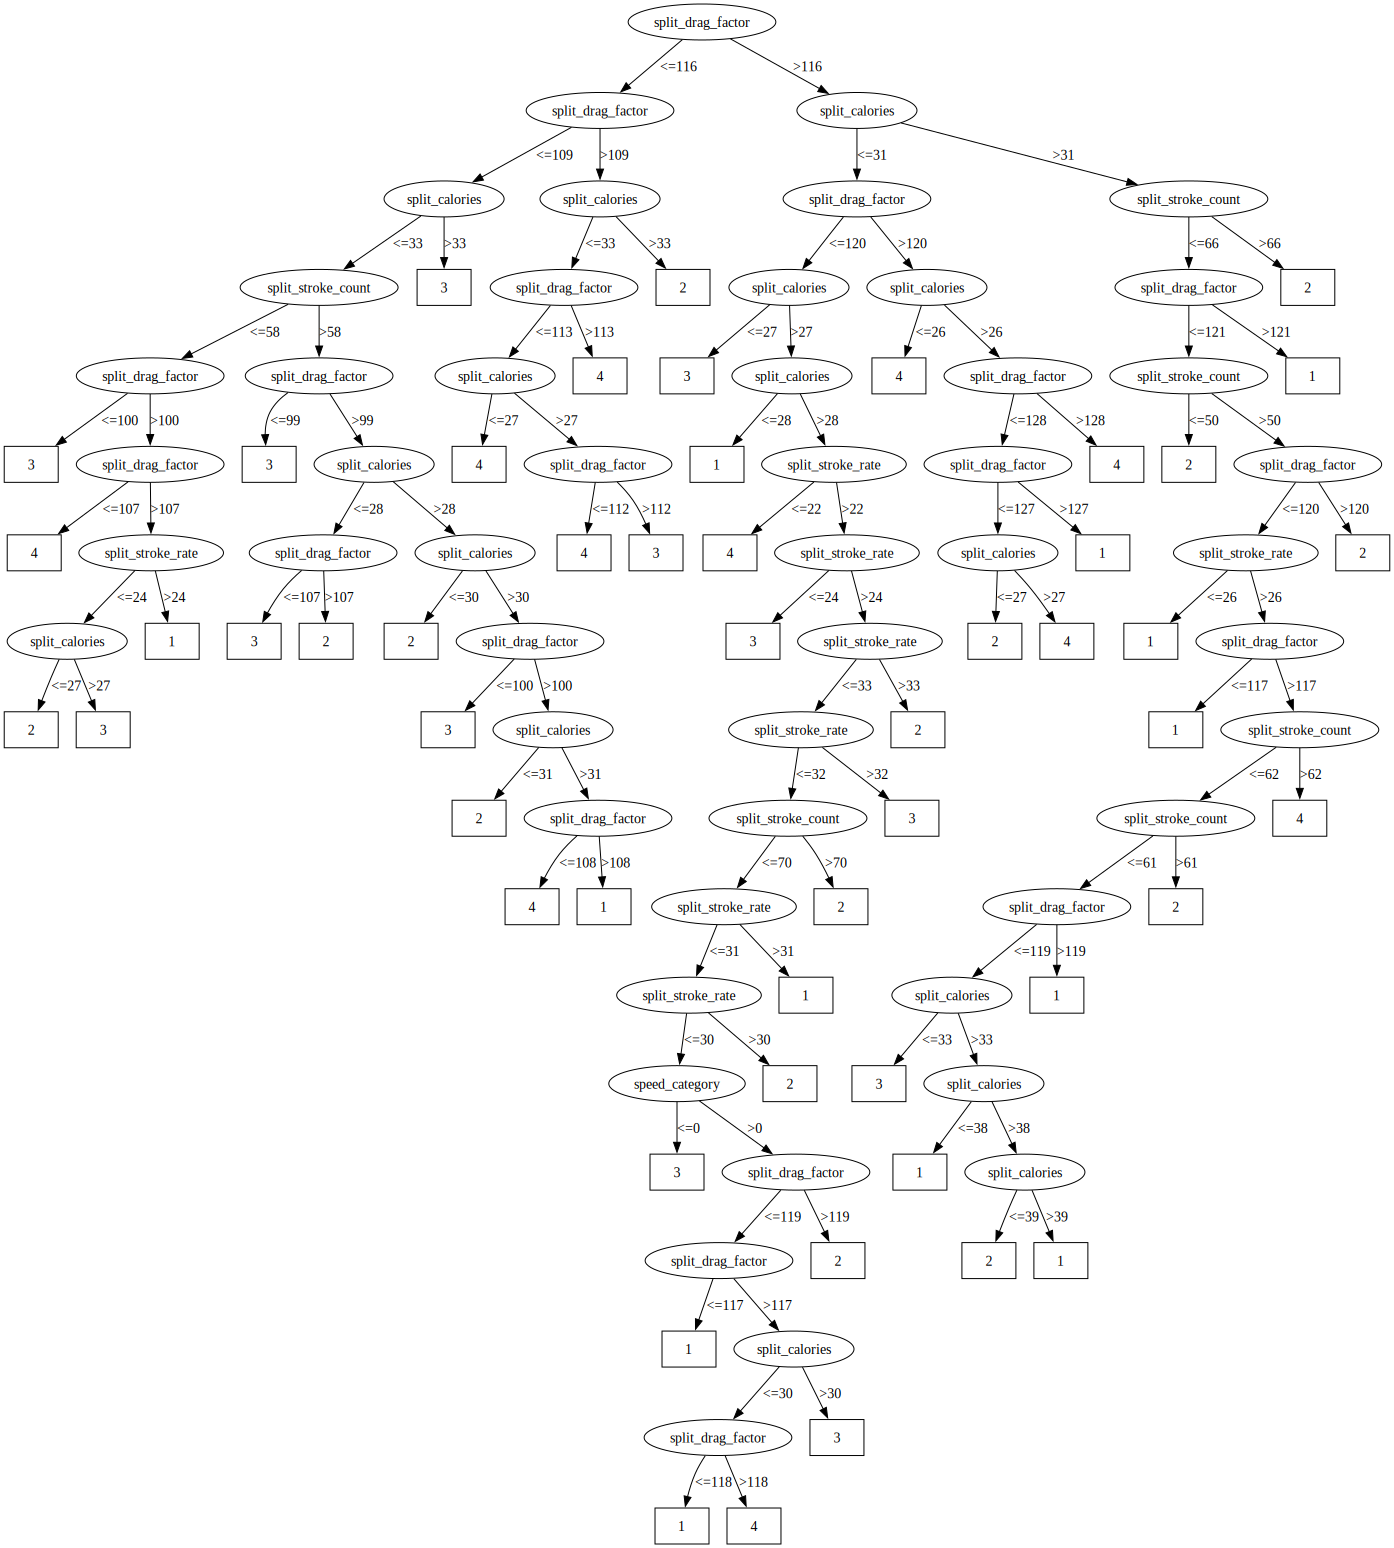

In [26]:
# Initialiation d'un arbre pour le dataset Iris:
arbre = classif.ClassifierArbreNumerique(dim, 0.0, X_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre.train(X,y)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre.number_leaves()," feuilles.")
graphe_arbre


In [27]:
# mesure du taux de bonne classification
arbre.accuracy(data_test,label_test)
print("Accuracy finale (train): ", arbre.accuracy(data_train,label_train))
print("Accuracy finale (test) : ", arbre.accuracy(data_test,label_test))

Accuracy finale (train):  0.0
Accuracy finale (test) :  0.0


Cet arbre possède  22  feuilles.


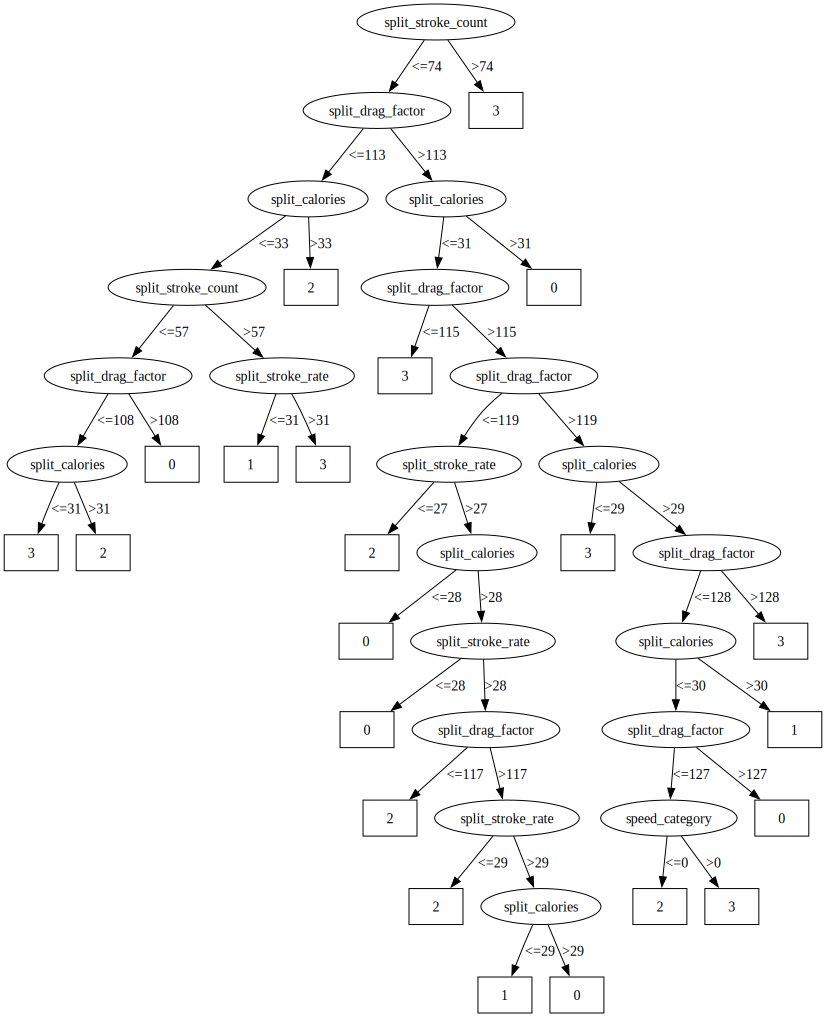

In [28]:
# Initialiation d'un arbre pour le dataset Iris:
arbre = classif.ClassifierArbreNumerique(dim, 0.75, X_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre.train(data_train,label_train)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre.number_leaves()," feuilles.")
graphe_arbre


In [29]:
# mesure du taux de bonne classification
arbre.accuracy(data_test,label_test)
print("Accuracy finale (train): ", arbre.accuracy(data_train,label_train))
print("Accuracy finale (test) : ", arbre.accuracy(data_test,label_test))

Accuracy finale (train):  0.75
Accuracy finale (test) :  0.42857142857142855


In [30]:
# ################### A COMPLETER 
arbre = classif.ClassifierArbreNumerique(dim, 0.0, X_noms)
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10)
toc= time.time()
# ################### 
       
print("\nValidation croisée sur les iris avec comme seuil ",0.0)
print("Perf obtenues : ",res_all)
print(f'\nAccuracy moyenne: {res_moy:.3f}\técart type: {res_sd:.3f}')

Itération 0  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 1  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 2  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.5714285714285714
Itération 3  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.42857142857142855
Itération 4  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.7142857142857143
Itération 5  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.2857142857142857
Itération 6  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.7142857142857143
Itération 7  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.5714285714285714
Itération 8  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.7142857142857143
Itération 9  : taille base app.= 63  taille base test= 7  Taux de bonne classif: 0.571428571428571

In [31]:
array = np.arange(0, 1.111, 0.101)
for i in range(len(array)) : 
  arbre = classif.ClassifierArbreNumerique(dim, array[i], X_noms)
  (res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10, verbose=False)
  print("run ",i,": seuil d'entropie =",array[i],"        accyracy moyenne: ",res_moy,"       écart type: ",res_sd)


run  0 : seuil d'entropie = 0.0         accyracy moyenne:  0.5285714285714286        écart type:  0.15714285714285714
run  1 : seuil d'entropie = 0.101         accyracy moyenne:  0.5285714285714286        écart type:  0.15714285714285714
run  2 : seuil d'entropie = 0.202         accyracy moyenne:  0.5285714285714286        écart type:  0.15714285714285714
run  3 : seuil d'entropie = 0.30300000000000005         accyracy moyenne:  0.5285714285714286        écart type:  0.15714285714285714
run  4 : seuil d'entropie = 0.404         accyracy moyenne:  0.5285714285714286        écart type:  0.15714285714285714
run  5 : seuil d'entropie = 0.505         accyracy moyenne:  0.5285714285714286        écart type:  0.15714285714285714
run  6 : seuil d'entropie = 0.6060000000000001         accyracy moyenne:  0.5142857142857142        écart type:  0.14568627181693672
run  7 : seuil d'entropie = 0.7070000000000001         accyracy moyenne:  0.4714285714285714        écart type:  0.15714285714285714
ru

In [36]:
df_res = pd.DataFrame(columns=['Entropie', 'Accuracy'])

# ################### A COMPLETER 
entropie = []
acc = []
for i in range(len(array)) : 
  arbre = classif.ClassifierArbreNumerique(dim, array[i], X_noms)
  (res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10, verbose=False)
  for j in range(len(res_all)) : 
    entropie.append(array[i])
    acc.append(res_all[j])

df_res["Entropie"] = entropie
df_res["Accuracy"] = acc

print("Entropie max accuracy:",df_res['Entropie'][np.argmax(df_res['Accuracy'])])
# ################### 
# Le datataframe obtenu :
df_res

Entropie max accuracy: 0.0


,Entropie,Accuracy
0,0.00,0.428571
1,0.00,0.285714
2,0.00,0.571429
3,0.00,0.428571
4,0.00,0.714286
...,...,...
105,1.01,0.142857
106,1.01,0.571429
107,1.01,0.285714
108,1.01,0.285714


<Axes: xlabel='Entropie', ylabel='Accuracy'>

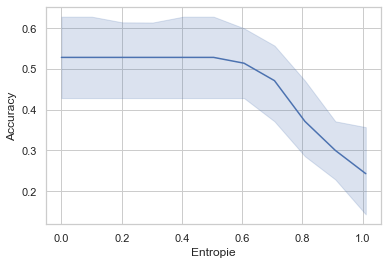

In [33]:
# Tracé avec lineplot
sns.lineplot(x="Entropie", y="Accuracy", data=df_res)